In [19]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [20]:
train_org = pd.read_csv('train.csv')
train = train_org.copy()
target = train['SalePrice']

train = train.drop(['Id', 'SalePrice'], axis=1)
data = train

print(train.shape)

(1460, 79)


## Cleaning

In [21]:
# checking data types
data.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [22]:
data['MSSubClass'] = data['MSSubClass'].astype(str)
data.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,8,2007
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2,2010
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,4,2010


In [23]:
# the % of Nan values for each column
pd.concat([data.isnull().sum(), round((data.isnull().sum() / len(data)), 2) * 100, data.dtypes], axis=1, keys=['Num', '% of total', 'Type'])

,Num,% of total,Type
MSSubClass,0,0.0,object
MSZoning,0,0.0,object
LotFrontage,259,18.0,float64
LotArea,0,0.0,int64
Street,0,0.0,object
...,...,...,...
MiscVal,0,0.0,int64
MoSold,0,0.0,int64
YrSold,0,0.0,int64
SaleType,0,0.0,object


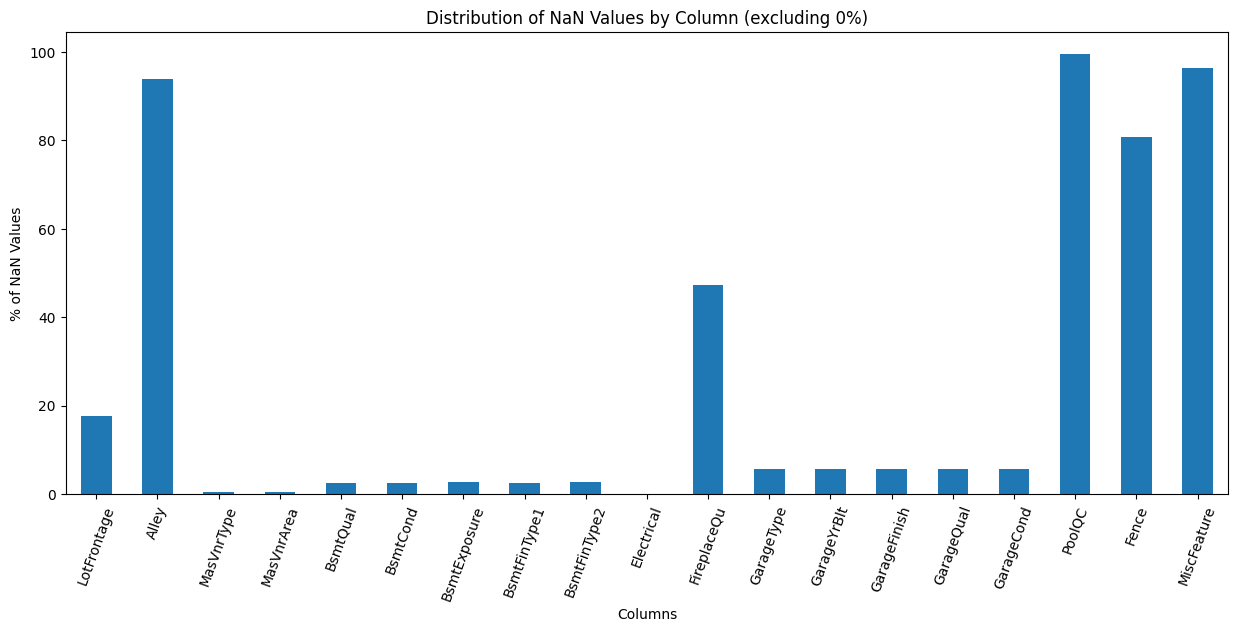

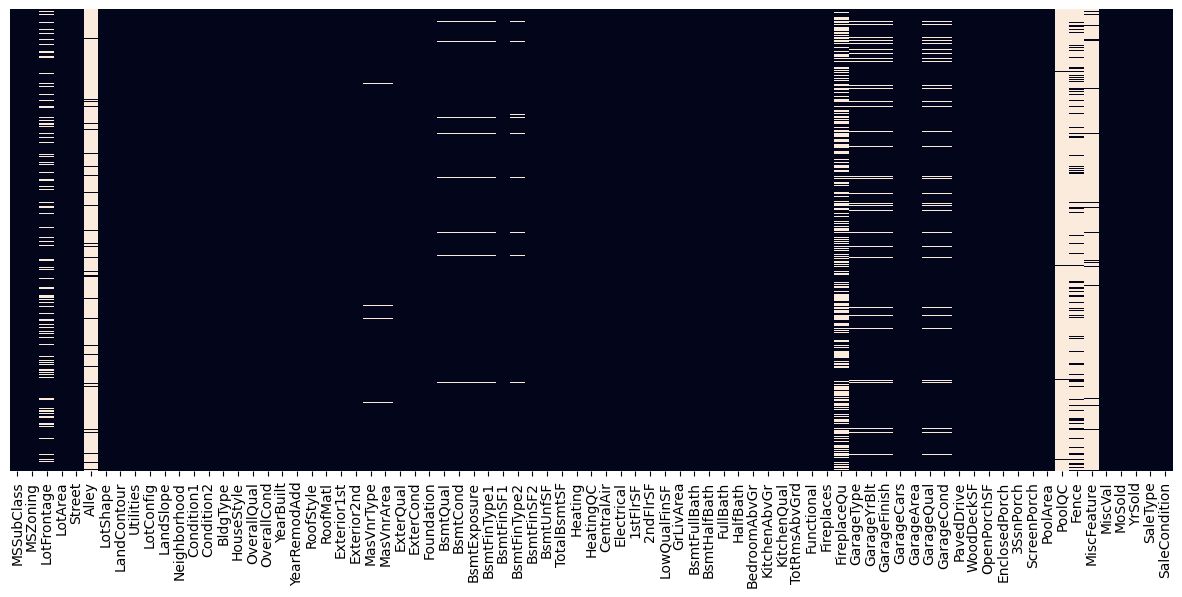

,%,Types
LotFrontage,17.739726,float64
Alley,93.767123,object
MasVnrType,0.547945,object
MasVnrArea,0.547945,float64
BsmtQual,2.534247,object
BsmtCond,2.534247,object
BsmtExposure,2.602740,object
BsmtFinType1,2.534247,object
BsmtFinType2,2.602740,object
Electrical,0.068493,object


In [24]:
nan_counts = data.isnull().sum()
nan_percentage = (nan_counts / len(data)) * 100

# Filtering out the columns that have 0 % of Nan values
non_zero_nan_percentage = nan_percentage[nan_percentage > 0]

# Plotting
plt.figure(figsize=(15, 6))
non_zero_nan_percentage.plot(kind='bar')
plt.title('Distribution of NaN Values by Column (excluding 0%)')
plt.xlabel('Columns')
plt.ylabel('% of NaN Values')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)
plt.show()


merged_df = non_zero_nan_percentage.to_frame(name='%').merge(data.dtypes.to_frame(name='Types'), left_index=True, right_index=True)
merged_df

As we can see, the majority comes from object data type. Next step would be look up if Na actually defined as None proprety or it is missing value

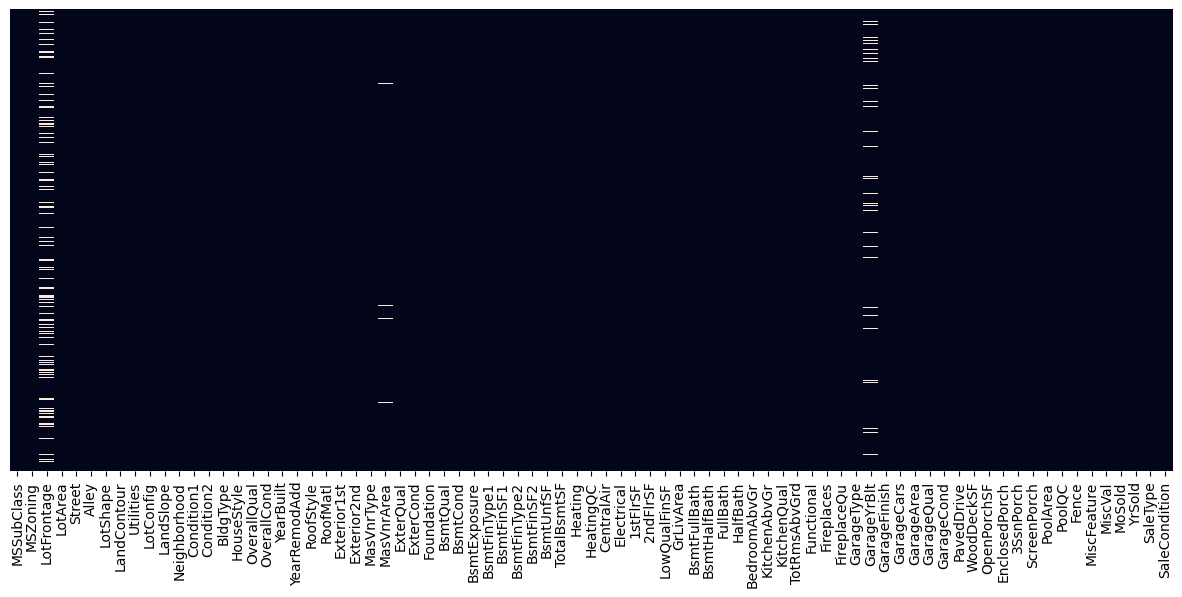

In [25]:
columns_const = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', ]
columns_missing = ['Foundation', 'LandSlope', 'LotConfig', 'PavedDrive', 'LandContour', 'LotShape', 'Street',
                   'MSZoning', 'MSSubClass', 'SaleType', 'Utilities', 'Condition1', 'Functional', 'ExterQual',
                   'MasVnrType', 'Exterior2nd', 'Heating', 'Neighborhood', 'SaleCondition', 'Electrical', 'Exterior1st',
                   'RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType', 'Condition2', 'KitchenQual', 'ExterCond',
                   'CentralAir', 'HeatingQC'
                   ]

for column in columns_const:
    data[column] = data[column].fillna('None')

for column in columns_missing:
    data[column] = data[column].fillna(data[column].mode()[0])

# To see the result I want to see how much have gone
plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)
plt.show()

In [26]:
def Imputation(data, missing):
    data = data.copy()
    numeric_df = data.select_dtypes(include=np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[missing].notna(), missing]
    X_train = numeric_df.loc[numeric_df[missing].notna(), non_na_columns]
    X_test = numeric_df.loc[numeric_df[missing].isna(), non_na_columns]

    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    data.loc[data[missing].isna(), missing] = y_pred

    return data

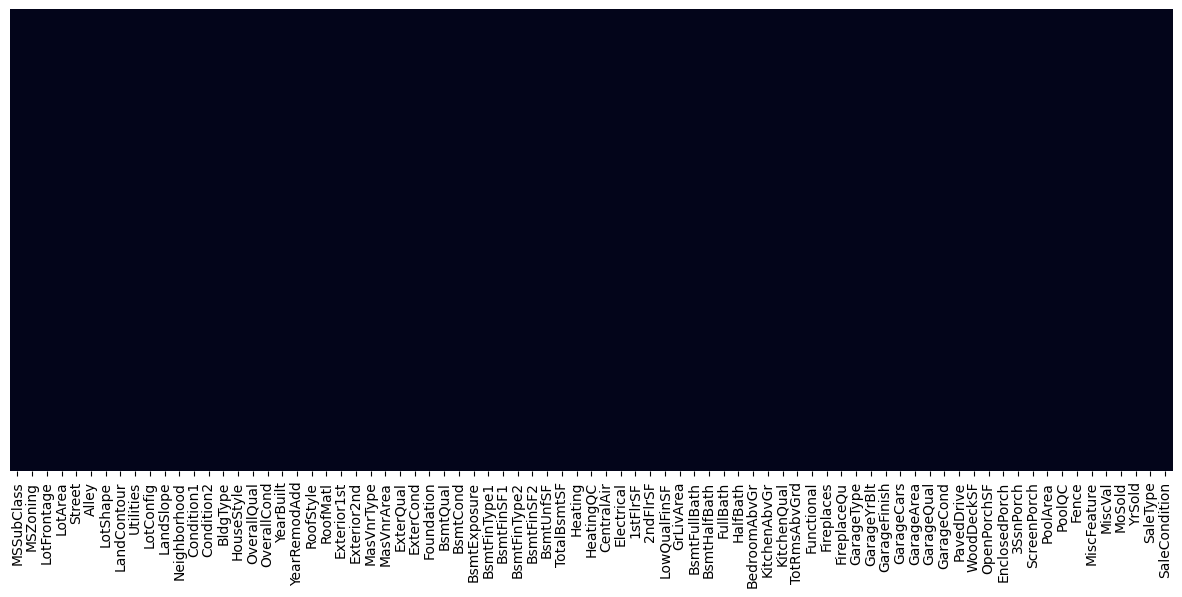

In [27]:
for column in data.columns[data.isna().sum() > 0].values:
    data = Imputation(data, column)

# # To see the result I want to see how much have gone
plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)
plt.show()

In [28]:
data = pd.get_dummies(data)

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor()
}

for model_name, model in models.items():

    scores = cross_val_score(model, data, target, cv=10, scoring='neg_mean_squared_error')
    mse_scores = -scores

    mean_mse = mse_scores.mean()
    mean_mae = cross_val_score(model, data, target, cv=10, scoring='neg_mean_absolute_error').mean()
    mean_r2 = cross_val_score(model, data, target, cv=10, scoring='r2').mean()

    print("Model:", model_name)
    print("Mean Squared Error:", mean_mse)
    print("Mean Absolute Error:", mean_mae)
    print("R-squared:", mean_r2)
    print("-----------------------------------")


Model: Linear Regression
Mean Squared Error: 6.215402470277838e+17
Mean Absolute Error: -44916240.22657128
R-squared: -100577086.32003441
-----------------------------------
Model: Decision Tree
Mean Squared Error: 1537397838.5260274
Mean Absolute Error: -25483.833561643834
R-squared: 0.7625575355799298
-----------------------------------
Model: Random Forest
Mean Squared Error: 868055832.7343165
Mean Absolute Error: -17427.177
R-squared: 0.8604086489969452
-----------------------------------
Model: Gradient Boosting
Mean Squared Error: 692534742.9404294
Mean Absolute Error: -15793.880264701098
R-squared: 0.8895910441266539
-----------------------------------
Model: SVR
Mean Squared Error: 6630138622.104781
Mean Absolute Error: -55570.45802371552
R-squared: -0.053796278926043065
-----------------------------------


/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Model: MLP
Mean Squared Error: 2181672078.0502295
Mean Absolute Error: -29183.96452666592
R-squared: 0.6582515202169816
-----------------------------------


/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Data Transformation

/var/folders/cl/vmg8p_6s67d93jnypwnb4x9h0000gn/T/ipykernel_4469/1730145098.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=True, fit=scipy.stats.norm)
/var/folders/cl/vmg8p_6s67d93jnypwnb4x9h0000gn/T/ipykernel_4469/1730145098.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

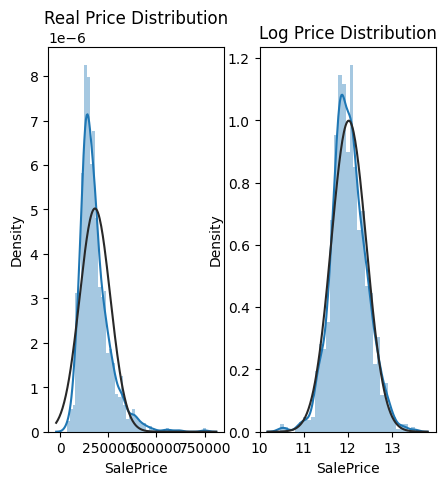

In [30]:
def plot_scew(feature, lable):
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(feature, kde=True, fit=scipy.stats.norm)
    plt.title(f"Real {lable} Distribution")

    plt.subplot(1, 2, 2)
    if feature.min() > 0:
        sns.distplot(np.log(feature), kde=True, fit=scipy.stats.norm)
        plt.title(f"Log {lable} Distribution")
    else:
        sns.distplot(np.log1p(feature), kde=True, fit=scipy.stats.norm)
        plt.title(f"Log1p  {lable} Distribution")

    plt.show()

plot_scew(target, 'Price')

In [31]:
skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
skew_df = skew_df.sort_values(by='Skew', ascending=False)
skew_df
# skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
# skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
# skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
# skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
# skew_df

,Feature,Skew
166,Exterior2nd_CBlock,38.170678
141,RoofMatl_Membran,38.170678
300,MiscFeature_TenC,38.170678
154,Exterior1st_ImStucc,38.170678
118,Condition2_RRAn,38.170678
...,...,...
140,RoofMatl_CompShg,-7.291912
114,Condition2_Norm,-9.713069
290,PoolQC_None,-14.337930
56,Street_Pave,-15.502821


/var/folders/cl/vmg8p_6s67d93jnypwnb4x9h0000gn/T/ipykernel_4469/1179263139.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attributes.iloc[:, i])
/var/folders/cl/vmg8p_6s67d93jnypwnb4x9h0000gn/T/ipykernel_4469/1179263139.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_attribute

ValueError: num must be an integer with 1 <= num <= 50, not 51

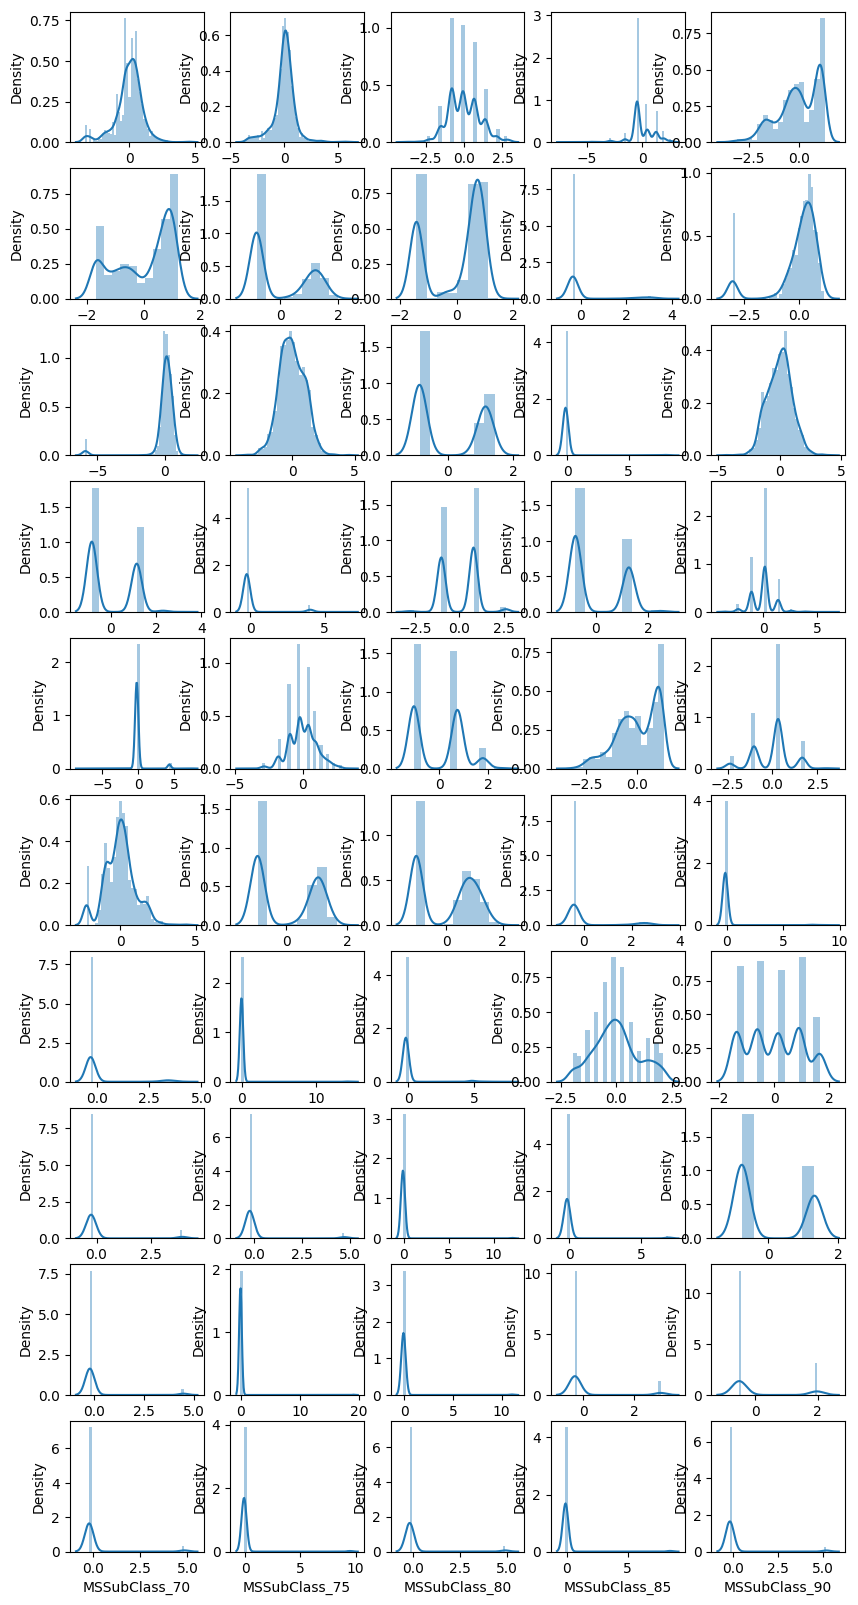

In [52]:
# plot_scew(train['MiscVal'], 'MiscVal')
# plot_scew(train['PoolArea'], 'PoolArea')
# plot_scew(train['LotArea'], 'LotArea')
# plot_scew(train['3SsnPorch'], '3SsnPorch')
# plot_scew(train['LowQualFinSF'], 'LowQualFinSF')
# plot_scew(train['KitchenAbvGr'], 'KitchenAbvGr')
# plot_scew(train['MasVnrArea'], 'MasVnrArea')

attributes = data.select_dtypes(exclude='object')
fig = plt.figure(figsize=(10, 20))

for i in range(len(attributes.columns)):
    fig.add_subplot(10, 5, i + 1)
    sns.distplot(attributes.iloc[:, i])

plt.tight_layout()
plt.show()

In [33]:
for column in skew_df[abs(skew_df['Skew']) > 0.5]['Feature'].values:
    data[column] = np.log1p(data[column])
log_target = np.log(target)

## Scailing

In [34]:
scaler = StandardScaler()
scaler.fit(data)

data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor()
}

for model_name, model in models.items():

    scores = cross_val_score(model, data, log_target, cv=10, scoring='neg_mean_squared_error')
    mse_scores = -scores

    mean_mse = mse_scores.mean()
    mean_mae = cross_val_score(model, data, log_target, cv=10, scoring='neg_mean_absolute_error').mean()
    mean_r2 = cross_val_score(model, data, log_target, cv=10, scoring='r2').mean()

    print("Model:", model_name)
    print("Mean Squared Error:", mean_mse)
    print("Mean Absolute Error:", mean_mae)
    print("R-squared:", mean_r2)
    print("-----------------------------------")

Model: Linear Regression
Mean Squared Error: 4.783641643286014e+24
Mean Absolute Error: -200021253482.8924
R-squared: -2.9415846995027077e+25
-----------------------------------
Model: Decision Tree
Mean Squared Error: 0.03717121985910906
Mean Absolute Error: -0.13810085032270877
R-squared: 0.7671921815794985
-----------------------------------
Model: Random Forest
Mean Squared Error: 0.02015598381289057
Mean Absolute Error: -0.09531559510180813
R-squared: 0.8753762504659452
-----------------------------------
Model: Gradient Boosting
Mean Squared Error: 0.016204895629394055
Mean Absolute Error: -0.08675525325084142
R-squared: 0.8993680433701471
-----------------------------------
Model: SVR
Mean Squared Error: 0.03617125355310261
Mean Absolute Error: -0.11720778239991254
R-squared: 0.7737306407392857
-----------------------------------


/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dimablack/Desktop/House_pricing/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Model: MLP
Mean Squared Error: 8.017549416895163
Mean Absolute Error: -1.141826542919035
R-squared: -43.286237320085235
-----------------------------------


There is a noticeable difference before and after data transformation. The Gradient Boosting model seems to be the best among the listed models.